In [10]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle
from joblib import dump,load
from sklearn.metrics import classification_report,f1_score,recall_score,precision_score
import shap
from matplotlib import pyplot
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
seen='./dataset/seen_split/'
unseen='./dataset/unseen_split/'

In [15]:
test.columns=test.columns.str.replace("_x","_1")
test.columns=test.columns.str.replace("_y","_2")
X.columns=X.columns.str.replace("_x","_1")
X.columns=X.columns.str.replace("_y","_2")
X

,size_1,size_2,boolean_1,float_1,integer_1,string_1,boolean_2,float_2,integer_2,string_2,outputscore
0,60.0,15,0,0.0,0.0,1,0,0,0,1,0.039571
1,60.0,100,0,0.0,0.0,1,0,0,1,0,0.078089
2,60.0,100,0,0.0,0.0,1,0,0,1,0,0.071789
3,60.0,15,0,0.0,0.0,1,0,0,0,1,0.029339
4,60.0,5,0,0.0,0.0,1,0,0,1,0,0.000003
...,...,...,...,...,...,...,...,...,...,...,...
93,2.0,100,1,0.0,0.0,0,0,0,1,0,0.000086
94,2.0,100,1,0.0,0.0,0,0,0,1,0,0.000084
95,2.0,15,1,0.0,0.0,0,0,0,0,1,0.000223
96,2.0,30,1,0.0,0.0,0,0,0,0,1,0.000203


{'class_weight': {1: 20}, 'max_depth': 15, 'min_samples_leaf': 20, 'n_estimators': 90}
the f1 score is 0.3333333333333333


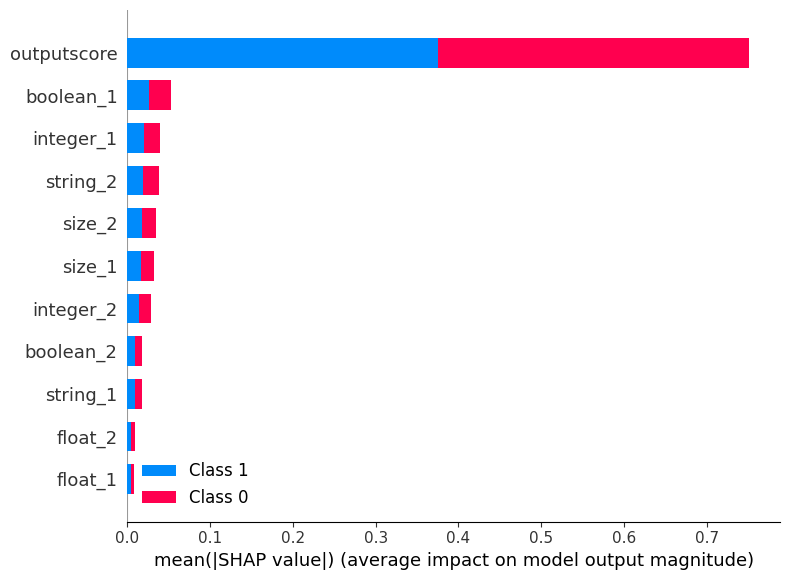

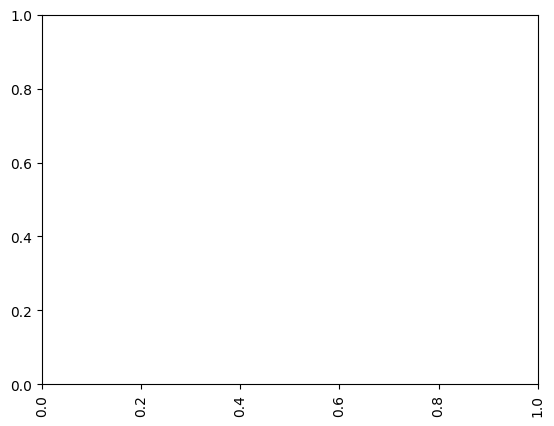

In [17]:
with open(unseen+'/real_estate_model/'+str(0)+'model_new_pkl' , 'rb') as f:
    model=pickle.load(f)
    print(model.best_params_)
    #max_depth=model.best_params_['max_depth'],
    clf = RandomForestClassifier(criterion='entropy',bootstrap=False,min_samples_leaf=model.best_params_['min_samples_leaf'],class_weight=model.best_params_['class_weight'], n_estimators=model.best_params_['n_estimators'])
    clf.fit(X,y)
    pre=clf.predict(test)
    print('the f1 score is',f1_score(testlabel,pre))
    shap_values = shap.TreeExplainer(clf).shap_values(X)
#     print(shap_values)

    shap.summary_plot(shap_values, X)
#     shap.summary_plot(shap_values[0], X.values, feature_names = X.columns)
    pyplot.xticks( rotation='vertical')
    importance = clf.feature_importances_
#     pyplot.bar(X.columns, importance)

In [9]:
X=pd.read_csv(seen+str(0)+'train_encode.csv')
X=X.loc[:,~X.columns.str.match("Unnamed")]
val=pd.read_csv(seen+str(0)+'val_encode.csv').reindex(columns=X.columns)
val=val.fillna(0)
X=X.append(val)
print(X)
vlabel=pd.read_csv(seen+str(0)+'val_label.csv')['label']
y=pd.read_csv(seen+str(0)+'train_label.csv')['label']
y=y.append(vlabel)
testlabel=pd.read_csv(seen+str(0)+'test_label.csv')['label']
test=pd.read_csv(seen+str(0)+'test_encode.csv').reindex(columns=X.columns)
test.fillna(0)
clf = RandomForestClassifier(class_weight={1:10},max_depth=10,min_samples_leaf=35,n_estimators=150)
clf.fit(X,y)
pre=clf.predict(test)
print(sum(pre))
print(sum(testlabel))
print('the f1 score is',f1_score(testlabel,pre))
print('the precision score is',precision_score(testlabel,pre))
print('the recall score is ',recall_score(testlabel,pre))

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


       size_x  size_y  boolean_x  float_x  integer_x  string_x  boolean_y  \
0        10.0      15          0        0          1         0          0   
1    500000.0      15          0        0          1         0          0   
2        30.0       2          0        0          0         1          1   
3        30.0     600          0        0          0         1          0   
4        60.0       5          0        0          0         1          0   
..        ...     ...        ...      ...        ...       ...        ...   
127       2.0     100          1        0          0         0          0   
128      15.0       1          0        0          0         1          0   
129      70.0     310          0        0          0         1          0   
130       2.0     100          1        0          0         0          0   
131       0.3       7          0        1          0         0          0   

     float_y  integer_y  string_y  outputscore  
0          0          0   

In [33]:
for i in range(5):
    X=pd.read_csv(seen+str(i)+'train_encode.csv')
    X=X.loc[:,~X.columns.str.match("Unnamed")]
    val=pd.read_csv(seen+str(i)+'val_encode.csv').reindex(columns=X.columns)
    val=val.fillna(0)
    X=X.append(val)
    print(X)
    vlabel=pd.read_csv(seen+str(i)+'val_label.csv')['label']
    y=pd.read_csv(seen+str(i)+'train_label.csv')['label']
    y=y.append(vlabel)
    testlabel=pd.read_csv(seen+str(i)+'test_label.csv')['label']
    test=pd.read_csv(seen+str(i)+'test_encode.csv').reindex(columns=X.columns)
    clf = RandomForestClassifier(bootstrap=False)
    n_estimators=[70,100,150,200]
    ones=[10,20,30,35,40,50,100]
    minSampleLeaf=[15,20,30,50,80]
    max_depth=[3,5,7,9,15]
    iterations=[5000]
    #'class_weight':[{1:classOne} for classOne in ones ]
    parameter={'class_weight':[{1:classOne} for classOne in ones ],'max_depth':max_depth,'min_samples_leaf':minSampleLeaf,'n_estimators':n_estimators}
    clfG=GridSearchCV(clf,parameter,scoring="f1",cv=5)
    clfG.fit(X,y)
    with open(seen+'/real_estate_model/'+str(i)+'model_new_pkl', 'wb') as files:
        pickle.dump(clfG, files)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


       size_x  size_y  boolean_x  float_x  integer_x  string_x  boolean_y  \
0        10.0      15          0        0          1         0          0   
1    500000.0      15          0        0          1         0          0   
2        30.0       2          0        0          0         1          1   
3        30.0     600          0        0          0         1          0   
4        60.0       5          0        0          0         1          0   
..        ...     ...        ...      ...        ...       ...        ...   
127       2.0     100          1        0          0         0          0   
128      15.0       1          0        0          0         1          0   
129      70.0     310          0        0          0         1          0   
130       2.0     100          1        0          0         0          0   
131       0.3       7          0        1          0         0          0   

     float_y  integer_y  string_y  outputscore  
0          0          0   

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


       size_x  size_y  boolean_x  float_x  integer_x  string_x  boolean_y  \
0        10.0      15          0        0          1         0          0   
1    500000.0      15          0        0          1         0          0   
2        30.0       2          0        0          0         1          1   
3        30.0     600          0        0          0         1          0   
4        60.0       5          0        0          0         1          0   
..        ...     ...        ...      ...        ...       ...        ...   
127       2.0     100          1        0          0         0          0   
128      15.0       1          0        0          0         1          0   
129      70.0     310          0        0          0         1          0   
130       2.0     100          1        0          0         0          0   
131       0.3       7          0        1          0         0          0   

     float_y  integer_y  string_y  outputscore  
0          0          0   

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


       size_x  size_y  boolean_x  float_x  integer_x  string_x  boolean_y  \
0        10.0      15          0        0          1         0          0   
1    500000.0      15          0        0          1         0          0   
2        30.0       2          0        0          0         1          1   
3        30.0     600          0        0          0         1          0   
4        60.0       5          0        0          0         1          0   
..        ...     ...        ...      ...        ...       ...        ...   
127       2.0     100          1        0          0         0          0   
128      15.0       1          0        0          0         1          0   
129      70.0     310          0        0          0         1          0   
130       2.0     100          1        0          0         0          0   
131       0.3       7          0        1          0         0          0   

     float_y  integer_y  string_y  outputscore  
0          0          0   

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


       size_x  size_y  boolean_x  float_x  integer_x  string_x  boolean_y  \
0        10.0      15          0        0          1         0          0   
1    500000.0      15          0        0          1         0          0   
2        30.0       2          0        0          0         1          1   
3        30.0     600          0        0          0         1          0   
4        60.0       5          0        0          0         1          0   
..        ...     ...        ...      ...        ...       ...        ...   
127       2.0     100          1        0          0         0          0   
128      15.0       1          0        0          0         1          0   
129      70.0     310          0        0          0         1          0   
130       2.0     100          1        0          0         0          0   
131       0.3       7          0        1          0         0          0   

     float_y  integer_y  string_y  outputscore  
0          0          0   

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


       size_x  size_y  boolean_x  float_x  integer_x  string_x  boolean_y  \
0        10.0      15          0        0          1         0          0   
1    500000.0      15          0        0          1         0          0   
2        30.0       2          0        0          0         1          1   
3        30.0     600          0        0          0         1          0   
4        60.0       5          0        0          0         1          0   
..        ...     ...        ...      ...        ...       ...        ...   
127       2.0     100          1        0          0         0          0   
128      15.0       1          0        0          0         1          0   
129      70.0     310          0        0          0         1          0   
130       2.0     100          1        0          0         0          0   
131       0.3       7          0        1          0         0          0   

     float_y  integer_y  string_y  outputscore  
0          0          0   

In [34]:
allf1=0
allrecall=0
allprecision=0
for i in range(5):    
    with open(seen+'/real_estate_model/'+str(i)+'model_new_pkl' , 'rb') as f:
        X=pd.read_csv(seen+str(i)+'train_encode.csv')
        X=X.loc[:,~X.columns.str.match("Unnamed")]
        testlabel=pd.read_csv(seen+str(i)+'test_label.csv')['label']
        test=pd.read_csv(seen+str(i)+'test_encode.csv').reindex(columns=X.columns)
        test.fillna(0)
        clfG = pickle.load(f)
        pre=clfG.predict(test)
        print(sum(pre))
        print(sum(testlabel))
        print('the f1 score is',f1_score(testlabel,pre))
        print('the precision score is',precision_score(testlabel,pre))
        print('the recall score is ',recall_score(testlabel,pre))
        allf1+=f1_score(testlabel,pre)
        allrecall+=recall_score(testlabel,pre)
        allprecision+=precision_score(testlabel,pre)
     
        print(clfG.best_params_)
        print(clfG.best_score_)
print('the average f1 of IMDB is',allf1/5)
print('the average recall score',allrecall/5)
print('the average precision score',allprecision/5)

6
7
the f1 score is 0.923076923076923
the precision score is 1.0
the recall score is  0.8571428571428571
{'class_weight': {1: 10}, 'max_depth': 5, 'min_samples_leaf': 20, 'n_estimators': 150}
0.96
6
7
the f1 score is 0.923076923076923
the precision score is 1.0
the recall score is  0.8571428571428571
{'class_weight': {1: 10}, 'max_depth': 3, 'min_samples_leaf': 15, 'n_estimators': 70}
0.9424761904761905
7
7
the f1 score is 0.8571428571428571
the precision score is 0.8571428571428571
the recall score is  0.8571428571428571
{'class_weight': {1: 10}, 'max_depth': 3, 'min_samples_leaf': 15, 'n_estimators': 70}
0.9424761904761905
6
7
the f1 score is 0.923076923076923
the precision score is 1.0
the recall score is  0.8571428571428571
{'class_weight': {1: 10}, 'max_depth': 3, 'min_samples_leaf': 15, 'n_estimators': 70}
0.9227106227106227
6
7
the f1 score is 0.923076923076923
the precision score is 1.0
the recall score is  0.8571428571428571
{'class_weight': {1: 10}, 'max_depth': 5, 'min_sampl

In [37]:
##unseen partition

In [12]:
X=pd.read_csv(unseen+str(0)+'train_encode.csv')
X=X.loc[:,~X.columns.str.match("Unnamed")]
val=pd.read_csv(unseen+str(0)+'val_encode.csv').reindex(columns=X.columns)
val=val.fillna(0)
vlabel=pd.read_csv(unseen+str(0)+'val_label.csv')['label']
X=X.append(val)
y=pd.read_csv(unseen+str(0)+'train_label.csv')['label']
y=y.append(vlabel)
testlabel=pd.read_csv(unseen+str(0)+'test_label.csv')['label']
test=pd.read_csv(unseen+str(0)+'test_encode.csv').reindex(columns=X.columns)
test=test.fillna(0)
# clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.8,max_depth=10, random_state=0).fit(X, y)
clf=RandomForestClassifier(max_depth=20, class_weight={1:20},min_samples_leaf=30,random_state=0).fit(X,y)
pre=clf.predict(test)
print(sum(pre))
print(sum(testlabel))
print('the f1 score is',f1_score(testlabel,pre))

6
6
the f1 score is 0.3333333333333333


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [47]:

for i in range(5):
    X=pd.read_csv(unseen+str(i)+'train_encode.csv')
    X=X.loc[:,~X.columns.str.match("Unnamed")]
    val=pd.read_csv(unseen+str(i)+'val_encode.csv').reindex(columns=X.columns)
    val=val.fillna(0)
    X=X.append(val)
    print(X)
    vlabel=pd.read_csv(unseen+str(i)+'val_label.csv')['label']
    y=pd.read_csv(unseen+str(i)+'train_label.csv')['label']
    y=y.append(vlabel)
    testlabel=pd.read_csv(unseen+str(i)+'test_label.csv')['label']
    test=pd.read_csv(unseen+str(i)+'test_encode.csv').reindex(columns=X.columns)
    clf = RandomForestClassifier(criterion='entropy',bootstrap=False)
    n_estimators=[50,70,90,100,150,200]
    ones=[20,30,35,40,50,100]
    minSampleLeaf=[20,30,50,80,100]
    max_depth=[10,15,20,7,5]

    parameter={'max_depth':max_depth,'n_estimators':n_estimators,'min_samples_leaf':minSampleLeaf,'class_weight':[{1:classOne} for classOne in ones ]}
    clfG=GridSearchCV(clf,parameter,scoring="f1",cv=5)
    clfG.fit(X,y)
    with open(unseen+'real_estate_model/'+str(i)+'model_new_pkl', 'wb') as files:
        pickle.dump(clfG, files)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


    size_x  size_y  boolean_x  float_x  integer_x  string_x  boolean_y  \
0     60.0      15          0      0.0        0.0         1          0   
1     60.0     100          0      0.0        0.0         1          0   
2     60.0     100          0      0.0        0.0         1          0   
3     60.0      15          0      0.0        0.0         1          0   
4     60.0       5          0      0.0        0.0         1          0   
..     ...     ...        ...      ...        ...       ...        ...   
93     2.0     100          1      0.0        0.0         0          0   
94     2.0     100          1      0.0        0.0         0          0   
95     2.0      15          1      0.0        0.0         0          0   
96     2.0      30          1      0.0        0.0         0          0   
97     2.0       7          1      0.0        0.0         0          0   

    float_y  integer_y  string_y  outputscore  
0         0          0         1     0.039571  
1         0    

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


    size_x  size_y  boolean_x  float_x  integer_x  string_x  boolean_y  \
0     60.0      15          0      0.0        0.0         1          0   
1     60.0     100          0      0.0        0.0         1          0   
2     60.0     100          0      0.0        0.0         1          0   
3     60.0      15          0      0.0        0.0         1          0   
4     60.0       5          0      0.0        0.0         1          0   
..     ...     ...        ...      ...        ...       ...        ...   
93     2.0     100          1      0.0        0.0         0          0   
94     2.0     100          1      0.0        0.0         0          0   
95     2.0      15          1      0.0        0.0         0          0   
96     2.0      30          1      0.0        0.0         0          0   
97     2.0       7          1      0.0        0.0         0          0   

    float_y  integer_y  string_y  outputscore  
0         0          0         1     0.015009  
1         0    

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


    size_x  size_y  boolean_x  float_x  integer_x  string_x  boolean_y  \
0     60.0      15          0      0.0        0.0         1          0   
1     60.0     100          0      0.0        0.0         1          0   
2     60.0     100          0      0.0        0.0         1          0   
3     60.0      15          0      0.0        0.0         1          0   
4     60.0       5          0      0.0        0.0         1          0   
..     ...     ...        ...      ...        ...       ...        ...   
93     2.0     100          1      0.0        0.0         0          0   
94     2.0     100          1      0.0        0.0         0          0   
95     2.0      15          1      0.0        0.0         0          0   
96     2.0      30          1      0.0        0.0         0          0   
97     2.0       7          1      0.0        0.0         0          0   

    float_y  integer_y  string_y  outputscore  
0         0          0         1     0.031055  
1         0    

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


    size_x  size_y  boolean_x  float_x  integer_x  string_x  boolean_y  \
0     60.0      15          0      0.0        0.0         1          0   
1     60.0     100          0      0.0        0.0         1          0   
2     60.0     100          0      0.0        0.0         1          0   
3     60.0      15          0      0.0        0.0         1          0   
4     60.0       5          0      0.0        0.0         1          0   
..     ...     ...        ...      ...        ...       ...        ...   
93     2.0     100          1      0.0        0.0         0          0   
94     2.0     100          1      0.0        0.0         0          0   
95     2.0      15          1      0.0        0.0         0          0   
96     2.0      30          1      0.0        0.0         0          0   
97     2.0       7          1      0.0        0.0         0          0   

    float_y  integer_y  string_y  outputscore  
0         0          0         1     0.137330  
1         0    

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


    size_x  size_y  boolean_x  float_x  integer_x  string_x  boolean_y  \
0     60.0      15          0      0.0        0.0         1          0   
1     60.0     100          0      0.0        0.0         1          0   
2     60.0     100          0      0.0        0.0         1          0   
3     60.0      15          0      0.0        0.0         1          0   
4     60.0       5          0      0.0        0.0         1          0   
..     ...     ...        ...      ...        ...       ...        ...   
93     2.0     100          1      0.0        0.0         0          0   
94     2.0     100          1      0.0        0.0         0          0   
95     2.0      15          1      0.0        0.0         0          0   
96     2.0      30          1      0.0        0.0         0          0   
97     2.0       7          1      0.0        0.0         0          0   

    float_y  integer_y  string_y  outputscore  
0         0          0         1     0.088048  
1         0    

In [51]:
allf1=0
allrecall=0
allprecision=0
for i in range(5):    
    with open(unseen+'/real_estate_model/'+str(i)+'model_new_pkl' , 'rb') as f:
        X=pd.read_csv(unseen+str(i)+'train_encode.csv')
        X=X.loc[:,~X.columns.str.match("Unnamed")]
        testlabel=pd.read_csv(unseen+str(i)+'test_label.csv')['label']
        test=pd.read_csv(unseen+str(i)+'test_encode.csv').reindex(columns=X.columns)
        test=test.fillna(0)
        print(test)
        clfG = pickle.load(f)
        pre=clfG.predict(test)
        print(sum(pre))
        print(sum(testlabel))
        print('the f1 score is',f1_score(testlabel,pre))
        print('the precision score is',precision_score(testlabel,pre))
        print('the recall score is ',recall_score(testlabel,pre))
        allf1+=f1_score(testlabel,pre)
        allrecall+=recall_score(testlabel,pre)
        allprecision+=precision_score(testlabel,pre)
        print(clfG.best_params_)
        print(clfG.best_score_)
        pd.DataFrame(pre).to_csv(unseen+'real_estate_unseen_prediction'+str(i)+".csv")
print('the average f1 of IMDB is',allf1/5)
print('the average recall score',allrecall/5)
print('the average precision score',allprecision/5)

    size_x  size_y  boolean_x  float_x  integer_x  string_x  boolean_y  \
0     30.0      15          0      0.0        0.0         1          0   
1     30.0     100          0      0.0        0.0         1          0   
2     30.0     100          0      0.0        0.0         1          0   
3     30.0      15          0      0.0        0.0         1          0   
4     30.0       5          0      0.0        0.0         1          0   
..     ...     ...        ...      ...        ...       ...        ...   
93     2.0     100          1      0.0        0.0         0          0   
94     2.0     100          1      0.0        0.0         0          0   
95     2.0      15          1      0.0        0.0         0          0   
96     2.0      30          1      0.0        0.0         0          0   
97     2.0       7          1      0.0        0.0         0          0   

    float_y  integer_y  string_y  outputscore  
0         0          0         1     0.060821  
1         0    

In [41]:

for i in range(5):
    X=pd.read_csv(unseen+str(i)+'train_encode.csv').reindex(columns=['outputscore'])
    X=X.loc[:,~X.columns.str.match("Unnamed")]
    val=pd.read_csv(unseen+str(i)+'val_encode.csv').reindex(columns=X.columns)
    val=val.fillna(0)
    X=X.append(val)
    print(X)
    vlabel=pd.read_csv(unseen+str(i)+'val_label.csv')['label']
    y=pd.read_csv(unseen+str(i)+'train_label.csv')['label']
    y=y.append(vlabel)
    testlabel=pd.read_csv(unseen+str(i)+'test_label.csv')['label']
    test=pd.read_csv(unseen+str(i)+'test_encode.csv').reindex(columns=X.columns)
    clf = RandomForestClassifier(criterion='entropy',bootstrap=False)
    n_estimators=[70,100,150,200]
    ones=[5,10,20,30,35,40]
    minSampleLeaf=[10,30,50,80,100]
    max_depth=[10,15,7,5]
    parameter={'max_depth':max_depth,'min_samples_leaf':minSampleLeaf,'n_estimators':n_estimators,'class_weight':[{1:classOne} for classOne in ones ]}
    clfG=GridSearchCV(clf,parameter,scoring="f1",cv=5)
    clfG.fit(X,y)
    with open(unseen+'real_estate_model/'+str(i)+'output_model_pkl', 'wb') as files:
        pickle.dump(clfG, files)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


    outputscore
0      0.039571
1      0.078089
2      0.071789
3      0.029339
4      0.000003
..          ...
93     0.000086
94     0.000084
95     0.000223
96     0.000203
97     0.000577

[1225 rows x 1 columns]


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


    outputscore
0      0.015009
1      0.011079
2      0.011199
3      0.014415
4      0.000051
..          ...
93     0.000160
94     0.000167
95     0.000498
96     0.000391
97     0.000508

[1225 rows x 1 columns]


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


    outputscore
0      0.031055
1      0.023005
2      0.021965
3      0.035845
4      0.000045
..          ...
93     0.000140
94     0.000140
95     0.000312
96     0.000214
97     0.002009

[1225 rows x 1 columns]


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


    outputscore
0      0.137330
1      0.118621
2      0.110216
3      0.131626
4      0.000222
..          ...
93     0.000266
94     0.000237
95     0.000355
96     0.000404
97     0.000587

[1225 rows x 1 columns]


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


    outputscore
0      0.088048
1      0.069462
2      0.066443
3      0.075029
4      0.000608
..          ...
93     0.000551
94     0.000548
95     0.000966
96     0.001232
97     0.001840

[1225 rows x 1 columns]


In [42]:
allf1=0
allrecall=0
allprecision=0
for i in range(5):    
    with open(unseen+'real_estate_model/'+str(i)+'output_model_pkl' , 'rb') as f:
        X=pd.read_csv(unseen+str(i)+'train_encode.csv').reindex(columns=['outputscore'])
        X=X.loc[:,~X.columns.str.match("Unnamed")]
        testlabel=pd.read_csv(unseen+str(i)+'test_label.csv')['label']
        test=pd.read_csv(unseen+str(i)+'test_encode.csv').reindex(columns=X.columns)
        test=test.fillna(0)
        clfG = pickle.load(f)
        pre=clfG.predict(test)
        print(sum(pre))
        print(sum(testlabel))
        print('the f1 score is',f1_score(testlabel,pre))
        print('the precision score is',precision_score(testlabel,pre))
        print('the recall score is ',recall_score(testlabel,pre))
        allf1+=f1_score(testlabel,pre)
        allrecall+=recall_score(testlabel,pre)
        allprecision+=precision_score(testlabel,pre)
        print(clfG.best_params_)
        print(clfG.best_score_)
print('the average f1 of IMDB is',allf1/5)
print('the average recall score',allrecall/5)
print('the average precision score',allprecision/5)

4
6
the f1 score is 0.2
the precision score is 0.25
the recall score is  0.16666666666666666
{'class_weight': {1: 5}, 'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 70}
0.8223942652329749
4
6
the f1 score is 0.2
the precision score is 0.25
the recall score is  0.16666666666666666
{'class_weight': {1: 5}, 'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 70}
0.8538217338217338
3
6
the f1 score is 0.2222222222222222
the precision score is 0.3333333333333333
the recall score is  0.16666666666666666
{'class_weight': {1: 5}, 'max_depth': 10, 'min_samples_leaf': 30, 'n_estimators': 70}
0.8628019323671496
2
6
the f1 score is 0.25
the precision score is 0.5
the recall score is  0.16666666666666666
{'class_weight': {1: 5}, 'max_depth': 10, 'min_samples_leaf': 80, 'n_estimators': 70}
0.7330773169482846
1
6
the f1 score is 0.2857142857142857
the precision score is 1.0
the recall score is  0.16666666666666666
{'class_weight': {1: 5}, 'max_depth': 10, 'min_samples_leaf': 30, 'n_est

In [43]:

for i in range(5):
    X=pd.read_csv(unseen+str(i)+'train_encode.csv').drop(columns=['outputscore'])
    X=X.loc[:,~X.columns.str.match("Unnamed")]
    val=pd.read_csv(unseen+str(i)+'val_encode.csv').reindex(columns=X.columns)
    val=val.fillna(0)
    X=X.append(val)
    print(X)
    vlabel=pd.read_csv(unseen+str(i)+'val_label.csv')['label']
    y=pd.read_csv(unseen+str(i)+'train_label.csv')['label']
    y=y.append(vlabel)
    testlabel=pd.read_csv(unseen+str(i)+'test_label.csv')['label']
    test=pd.read_csv(unseen+str(i)+'test_encode.csv').reindex(columns=X.columns)
    clf = RandomForestClassifier(criterion='entropy',bootstrap=False)
    n_estimators=[70,100,150,200]
    ones=[10,20,30,35,40,50,100,200]
    minSampleLeaf=[10,30,50,80,100,200,250]
    max_depth=[10,15,20,7]
    parameter={'max_depth':max_depth,'min_samples_leaf':minSampleLeaf,'n_estimators':n_estimators,'class_weight':[{1:classOne} for classOne in ones ]}
    clfG=GridSearchCV(clf,parameter,scoring="f1",cv=5)
    clfG.fit(X,y)
    with open(unseen+'real_estate_model/'+str(i)+'constraint_model_pkl', 'wb') as files:
        pickle.dump(clfG, files)

    size_x  size_y  boolean_x  float_x  integer_x  string_x  boolean_y  \
0     60.0      15          0      0.0        0.0         1          0   
1     60.0     100          0      0.0        0.0         1          0   
2     60.0     100          0      0.0        0.0         1          0   
3     60.0      15          0      0.0        0.0         1          0   
4     60.0       5          0      0.0        0.0         1          0   
..     ...     ...        ...      ...        ...       ...        ...   
93     2.0     100          1      0.0        0.0         0          0   
94     2.0     100          1      0.0        0.0         0          0   
95     2.0      15          1      0.0        0.0         0          0   
96     2.0      30          1      0.0        0.0         0          0   
97     2.0       7          1      0.0        0.0         0          0   

    float_y  integer_y  string_y  
0         0          0         1  
1         0          1         0  
2     

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


    size_x  size_y  boolean_x  float_x  integer_x  string_x  boolean_y  \
0     60.0      15          0      0.0        0.0         1          0   
1     60.0     100          0      0.0        0.0         1          0   
2     60.0     100          0      0.0        0.0         1          0   
3     60.0      15          0      0.0        0.0         1          0   
4     60.0       5          0      0.0        0.0         1          0   
..     ...     ...        ...      ...        ...       ...        ...   
93     2.0     100          1      0.0        0.0         0          0   
94     2.0     100          1      0.0        0.0         0          0   
95     2.0      15          1      0.0        0.0         0          0   
96     2.0      30          1      0.0        0.0         0          0   
97     2.0       7          1      0.0        0.0         0          0   

    float_y  integer_y  string_y  
0         0          0         1  
1         0          1         0  
2     

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


    size_x  size_y  boolean_x  float_x  integer_x  string_x  boolean_y  \
0     60.0      15          0      0.0        0.0         1          0   
1     60.0     100          0      0.0        0.0         1          0   
2     60.0     100          0      0.0        0.0         1          0   
3     60.0      15          0      0.0        0.0         1          0   
4     60.0       5          0      0.0        0.0         1          0   
..     ...     ...        ...      ...        ...       ...        ...   
93     2.0     100          1      0.0        0.0         0          0   
94     2.0     100          1      0.0        0.0         0          0   
95     2.0      15          1      0.0        0.0         0          0   
96     2.0      30          1      0.0        0.0         0          0   
97     2.0       7          1      0.0        0.0         0          0   

    float_y  integer_y  string_y  
0         0          0         1  
1         0          1         0  
2     

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


    size_x  size_y  boolean_x  float_x  integer_x  string_x  boolean_y  \
0     60.0      15          0      0.0        0.0         1          0   
1     60.0     100          0      0.0        0.0         1          0   
2     60.0     100          0      0.0        0.0         1          0   
3     60.0      15          0      0.0        0.0         1          0   
4     60.0       5          0      0.0        0.0         1          0   
..     ...     ...        ...      ...        ...       ...        ...   
93     2.0     100          1      0.0        0.0         0          0   
94     2.0     100          1      0.0        0.0         0          0   
95     2.0      15          1      0.0        0.0         0          0   
96     2.0      30          1      0.0        0.0         0          0   
97     2.0       7          1      0.0        0.0         0          0   

    float_y  integer_y  string_y  
0         0          0         1  
1         0          1         0  
2     

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


    size_x  size_y  boolean_x  float_x  integer_x  string_x  boolean_y  \
0     60.0      15          0      0.0        0.0         1          0   
1     60.0     100          0      0.0        0.0         1          0   
2     60.0     100          0      0.0        0.0         1          0   
3     60.0      15          0      0.0        0.0         1          0   
4     60.0       5          0      0.0        0.0         1          0   
..     ...     ...        ...      ...        ...       ...        ...   
93     2.0     100          1      0.0        0.0         0          0   
94     2.0     100          1      0.0        0.0         0          0   
95     2.0      15          1      0.0        0.0         0          0   
96     2.0      30          1      0.0        0.0         0          0   
97     2.0       7          1      0.0        0.0         0          0   

    float_y  integer_y  string_y  
0         0          0         1  
1         0          1         0  
2     

In [45]:
allf1=0
allrecall=0
allprecision=0
for i in range(5):    
    with open(unseen+'real_estate_model/'+str(i)+'constraint_model_pkl' , 'rb') as f:
        X=pd.read_csv(unseen+str(i)+'train_encode.csv').drop(columns=['outputscore'])
        X=X.loc[:,~X.columns.str.match("Unnamed")]
        testlabel=pd.read_csv(unseen+str(i)+'test_label.csv')['label']
        test=pd.read_csv(unseen+str(i)+'test_encode.csv').reindex(columns=X.columns)
        test=test.fillna(0)
        clfG = pickle.load(f)
        pre=clfG.predict(test)
        print(sum(pre))
        print(sum(testlabel))
        print('the f1 score is',f1_score(testlabel,pre))
        print('the precision score is',precision_score(testlabel,pre))
        print('the recall score is ',recall_score(testlabel,pre))
        allf1+=f1_score(testlabel,pre)
        allrecall+=recall_score(testlabel,pre)
        allprecision+=precision_score(testlabel,pre)
        print(clfG.best_params_)
        print(clfG.best_score_)
print('the average f1 of IMDB is',allf1/5)
print('the average recall score',allrecall/5)
print('the average precision score',allprecision/5)

0
6
the f1 score is 0.0
the precision score is 0.0
the recall score is  0.0
{'class_weight': {1: 10}, 'max_depth': 7, 'min_samples_leaf': 80, 'n_estimators': 100}
0.22584670231729054
28
6
the f1 score is 0.35294117647058826
the precision score is 0.21428571428571427
the recall score is  1.0
{'class_weight': {1: 100}, 'max_depth': 7, 'min_samples_leaf': 10, 'n_estimators': 70}
0.20800328997050305
25
6
the f1 score is 0.3870967741935484
the precision score is 0.24
the recall score is  1.0
{'class_weight': {1: 100}, 'max_depth': 7, 'min_samples_leaf': 10, 'n_estimators': 150}
0.19658045067277974
28
6
the f1 score is 0.35294117647058826
the precision score is 0.21428571428571427
the recall score is  1.0
{'class_weight': {1: 200}, 'max_depth': 7, 'min_samples_leaf': 10, 'n_estimators': 100}
0.20610560252351298
28
6
the f1 score is 0.35294117647058826
the precision score is 0.21428571428571427
the recall score is  1.0
{'class_weight': {1: 200}, 'max_depth': 7, 'min_samples_leaf': 10, 'n_esti

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
